In [1]:
import pandas as pd

In [2]:
vitals_long = pd.read_csv('vitals_long.csv')

In [3]:
vitals_long

,subject_id,hadm_id,stay_id,charttime,itemid,valuenum,concept,intime,hour
0,12466550,23998182,30000153,2174-09-29 12:09:00,220210,18.0,resp_rate,2174-09-29 12:09:00,0
1,12466550,23998182,30000153,2174-09-29 13:00:00,220179,113.0,sbp,2174-09-29 12:09:00,0
2,12466550,23998182,30000153,2174-09-29 13:00:00,220180,77.0,dbp,2174-09-29 12:09:00,0
3,12466550,23998182,30000153,2174-09-29 13:00:00,220045,104.0,heart_rate,2174-09-29 12:09:00,0
4,12466550,23998182,30000153,2174-09-29 13:00:00,220277,100.0,spo2,2174-09-29 12:09:00,0
...,...,...,...,...,...,...,...,...,...
14677043,11305179,22341980,39999286,2158-03-08 14:00:00,220210,21.0,resp_rate,2158-03-07 11:15:18,26
14677044,11305179,22341980,39999286,2158-03-08 14:00:00,220277,94.0,spo2,2158-03-07 11:15:18,26
14677045,11305179,22341980,39999286,2158-03-08 14:11:00,220179,136.0,sbp,2158-03-07 11:15:18,26
14677046,11305179,22341980,39999286,2158-03-08 14:11:00,220181,94.0,mbp,2158-03-07 11:15:18,26


In [4]:
sepsis_comorbidity = pd.read_csv('sepsis_comorbidity.csv')

In [5]:
sepsis_comorbidity

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,suspected_infection_time,sofa_time,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3
0,10016810,20973395,35436337,2185-06-16 01:31:00,2185-06-21 15:55:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10025612,23403708,32587226,2125-09-25 07:15:00,2125-10-03 12:24:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10096969,25079335,36452771,2190-02-03 13:20:00,2190-02-05 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10098993,21687208,35673013,2166-02-16 09:32:00,2166-02-21 14:55:00,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10141035,24374681,38562441,2144-11-16 22:10:00,2144-11-22 16:12:00,0,0,0,0,0,...,2144-11-16 18:30:00,2144-11-17 04:00:00,5.0,0.0,0.0,0.0,1.0,0.0,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26100,19970470,23848017,33533600,2146-12-05 15:56:00,2146-12-07 18:40:00,1,0,0,0,0,...,2146-12-05 17:00:00,2146-12-05 17:00:00,11.0,3.0,0.0,0.0,4.0,0.0,4.0,True
26101,19974380,27355109,35371457,2182-06-30 22:33:00,2182-07-12 18:10:00,0,1,1,1,0,...,2182-07-01 04:59:00,2182-07-01 10:00:00,6.0,0.0,1.0,0.0,0.0,2.0,3.0,True
26102,19984259,20109446,37233855,2153-11-29 23:43:00,2153-12-08 17:05:00,0,1,1,0,1,...,2153-11-30 20:10:00,2153-11-30 21:00:00,4.0,2.0,0.0,0.0,0.0,2.0,0.0,True
26103,19992202,20329411,36409124,2153-02-26 00:48:00,2153-03-02 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
# drop rows where ICU join failed
vitals_long = vitals_long.dropna(subset=["intime", "hour"])

# make hour int
vitals_long["hour"] = vitals_long["hour"].astype(int)

# fix any concept typos (optional)
vitals_long["concept"] = vitals_long["concept"].replace({"heart_r": "heart_rate"})


In [7]:
vitals_long

,subject_id,hadm_id,stay_id,charttime,itemid,valuenum,concept,intime,hour
0,12466550,23998182,30000153,2174-09-29 12:09:00,220210,18.0,resp_rate,2174-09-29 12:09:00,0
1,12466550,23998182,30000153,2174-09-29 13:00:00,220179,113.0,sbp,2174-09-29 12:09:00,0
2,12466550,23998182,30000153,2174-09-29 13:00:00,220180,77.0,dbp,2174-09-29 12:09:00,0
3,12466550,23998182,30000153,2174-09-29 13:00:00,220045,104.0,heart_rate,2174-09-29 12:09:00,0
4,12466550,23998182,30000153,2174-09-29 13:00:00,220277,100.0,spo2,2174-09-29 12:09:00,0
...,...,...,...,...,...,...,...,...,...
14677043,11305179,22341980,39999286,2158-03-08 14:00:00,220210,21.0,resp_rate,2158-03-07 11:15:18,26
14677044,11305179,22341980,39999286,2158-03-08 14:00:00,220277,94.0,spo2,2158-03-07 11:15:18,26
14677045,11305179,22341980,39999286,2158-03-08 14:11:00,220179,136.0,sbp,2158-03-07 11:15:18,26
14677046,11305179,22341980,39999286,2158-03-08 14:11:00,220181,94.0,mbp,2158-03-07 11:15:18,26


In [8]:
sc = sepsis_comorbidity.copy()
for c in ["suspected_infection_time", "sofa_time"]:
    sc[c] = pd.to_datetime(sc[c], errors="coerce")

sc["sepsis_onset_time"] = pd.NaT

mask = (
    sc["suspected_infection_time"].notna()
    & sc["sofa_time"].notna()
    & (sc["sofa_time"] >= sc["suspected_infection_time"])
)

onset_df = (
    sc.loc[mask, ["stay_id", "sofa_time"]]
      .groupby("stay_id", as_index=False)["sofa_time"]
      .min()
      .rename(columns={"sofa_time": "sepsis_onset_time"})
)

# merge onset back
sc = sc.merge(onset_df, on="stay_id", how="left")


In [9]:
sc

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3,sepsis_onset_time_x,sepsis_onset_time_y
0,10016810,20973395,35436337,2185-06-16 01:31:00,2185-06-21 15:55:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
1,10025612,23403708,32587226,2125-09-25 07:15:00,2125-10-03 12:24:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
2,10096969,25079335,36452771,2190-02-03 13:20:00,2190-02-05 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
3,10098993,21687208,35673013,2166-02-16 09:32:00,2166-02-21 14:55:00,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
4,10141035,24374681,38562441,2144-11-16 22:10:00,2144-11-22 16:12:00,0,0,0,0,0,...,5.0,0.0,0.0,0.0,1.0,0.0,4.0,True,NaT,2144-11-17 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26100,19970470,23848017,33533600,2146-12-05 15:56:00,2146-12-07 18:40:00,1,0,0,0,0,...,11.0,3.0,0.0,0.0,4.0,0.0,4.0,True,NaT,2146-12-05 17:00:00
26101,19974380,27355109,35371457,2182-06-30 22:33:00,2182-07-12 18:10:00,0,1,1,1,0,...,6.0,0.0,1.0,0.0,0.0,2.0,3.0,True,NaT,2182-07-01 10:00:00
26102,19984259,20109446,37233855,2153-11-29 23:43:00,2153-12-08 17:05:00,0,1,1,0,1,...,4.0,2.0,0.0,0.0,0.0,2.0,0.0,True,NaT,2153-11-30 21:00:00
26103,19992202,20329411,36409124,2153-02-26 00:48:00,2153-03-02 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT


In [10]:
agg = (
    vitals_long
    .groupby(["stay_id", "hour", "concept"])["valuenum"]
    .agg(["mean", "min", "max", "last", "count"])
    .reset_index()
)

# rename columns
agg = agg.rename(columns={
    "mean":"val_mean",
    "min":"val_min",
    "max":"val_max",
    "last":"val_last",
    "count":"n_obs"
})


In [11]:
agg

,stay_id,hour,concept,val_mean,val_min,val_max,val_last,n_obs
0,30000153,0,dbp,77.0,77.0,77.0,77.0,1
1,30000153,0,heart_rate,104.0,104.0,104.0,104.0,1
2,30000153,0,mbp,84.0,84.0,84.0,84.0,1
3,30000153,0,resp_rate,17.0,16.0,18.0,16.0,2
4,30000153,0,sbp,113.0,113.0,113.0,113.0,1
...,...,...,...,...,...,...,...,...
12435637,39999286,26,heart_rate,95.0,95.0,95.0,95.0,1
12435638,39999286,26,mbp,94.0,94.0,94.0,94.0,1
12435639,39999286,26,resp_rate,21.0,21.0,21.0,21.0,1
12435640,39999286,26,sbp,136.0,136.0,136.0,136.0,1


In [12]:
wide = agg.pivot_table(
    index=["stay_id","hour"],
    columns="concept",
    values=["val_mean","val_min","val_max","val_last","n_obs"]
)

wide.columns = [f"{stat}_{concept}" for stat, concept in wide.columns]
wide = wide.reset_index()


In [13]:
vital_signs = {
    "heart_rate": [220045],
    "sbp": [220179, 220050, 225309],
    "dbp": [220180, 220051, 225310],
    "mbp": [220052, 220181, 225312],
    "resp_rate": [220210, 224690],
    "temperature": [223761, 223762],
    "temperature_site": [224642],   # usually categorical; probably drop from numeric features
    "spo2": [220277],
    "glucose": [225664, 220621, 226537],
}

In [14]:
for concept in vital_signs.keys():
    col = f"val_last_{concept}"
    if col in wide.columns:
        wide[f"missing_{concept}"] = wide[col].isna().astype(int)


In [15]:
wide

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,val_min_spo2,val_min_temperature,missing_heart_rate,missing_sbp,missing_dbp,missing_mbp,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose
0,30000153,0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,NaN,...,100.0,NaN,0,0,0,0,0,1,0,1
1,30000153,1,2.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,NaN,99.1,1,0,0,0,0,0,1,0
2,30000153,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,100.0,NaN,0,1,1,1,1,1,0,1
3,30000153,3,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,100.0,99.5,0,0,0,0,0,0,0,0
4,30000153,4,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,100.0,NaN,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976960,39999286,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,95.0,NaN,0,0,0,0,0,1,0,0
1976961,39999286,23,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,95.0,NaN,0,0,0,0,0,1,0,1
1976962,39999286,24,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,96.0,97.9,0,0,0,0,0,0,0,1
1976963,39999286,25,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,93.0,NaN,0,0,0,0,0,1,0,1


In [16]:
wide.columns

Index(['stay_id', 'hour', 'n_obs_dbp', 'n_obs_glucose', 'n_obs_heart_rate',
       'n_obs_mbp', 'n_obs_resp_rate', 'n_obs_sbp', 'n_obs_spo2',
       'n_obs_temperature', 'val_last_dbp', 'val_last_glucose',
       'val_last_heart_rate', 'val_last_mbp', 'val_last_resp_rate',
       'val_last_sbp', 'val_last_spo2', 'val_last_temperature', 'val_max_dbp',
       'val_max_glucose', 'val_max_heart_rate', 'val_max_mbp',
       'val_max_resp_rate', 'val_max_sbp', 'val_max_spo2',
       'val_max_temperature', 'val_mean_dbp', 'val_mean_glucose',
       'val_mean_heart_rate', 'val_mean_mbp', 'val_mean_resp_rate',
       'val_mean_sbp', 'val_mean_spo2', 'val_mean_temperature', 'val_min_dbp',
       'val_min_glucose', 'val_min_heart_rate', 'val_min_mbp',
       'val_min_resp_rate', 'val_min_sbp', 'val_min_spo2',
       'val_min_temperature', 'missing_heart_rate', 'missing_sbp',
       'missing_dbp', 'missing_mbp', 'missing_resp_rate',
       'missing_temperature', 'missing_spo2', 'missing_glucose'],

In [17]:
concepts = ["heart_rate","sbp","dbp","mbp","resp_rate","temperature","spo2","glucose"]

val_cols = [f"val_last_{c}" for c in concepts]
nobs_cols = [f"n_obs_{c}" for c in concepts]


In [18]:
concepts_present = [c.replace("val_last_","") for c in val_cols]


In [19]:
M = pd.DataFrame(index=wide.index)
for c in concepts_present:
    M[c] = (wide[f"n_obs_{c}"].fillna(0) > 0).astype(int)


In [20]:
DT = pd.DataFrame(index=wide.index)
for c in concepts_present:
    observed_hour = wide["hour"].where(M[c] == 1)
    last_obs = observed_hour.groupby(wide["stay_id"]).ffill()
    DT[c] = wide["hour"] - last_obs
    DT[c] = DT[c].fillna(wide["hour"] + 1)   # never observed yet


In [21]:
X_raw = wide[val_cols].copy()
X_raw.columns = concepts_present  # rename to concept only


In [22]:
X_raw

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose
0,104.0,113.0,77.0,84.0,16.0,NaN,100.0,NaN
1,NaN,131.0,61.0,80.0,16.0,99.1,NaN,176.0
2,83.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
3,83.0,109.0,55.0,71.0,16.0,99.5,100.0,175.0
4,103.0,111.0,56.0,71.0,20.0,NaN,100.0,NaN
...,...,...,...,...,...,...,...,...
1976960,97.0,121.0,77.0,88.0,18.0,NaN,95.0,156.0
1976961,97.0,132.0,79.0,91.0,17.0,NaN,95.0,NaN
1976962,88.0,128.0,80.0,91.0,17.0,97.9,96.0,NaN
1976963,96.0,137.0,79.0,91.0,20.0,NaN,93.0,NaN


In [23]:
X_gru = X_raw.groupby(wide["stay_id"]).ffill()

# fill remaining NaNs with train means later
# for now just fill with column means computed on THIS df (replace with train-only mean in real split)
col_means = X_gru.mean(skipna=True)
X_gru = X_gru.fillna(col_means)

In [24]:
X_gru

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose
0,104.0,113.0,77.0,84.0,16.0,95.401866,100.0,237.536591
1,104.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
2,83.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
3,83.0,109.0,55.0,71.0,16.0,99.500000,100.0,175.000000
4,103.0,111.0,56.0,71.0,20.0,99.500000,100.0,175.000000
...,...,...,...,...,...,...,...,...
1976960,97.0,121.0,77.0,88.0,18.0,97.200000,95.0,156.000000
1976961,97.0,132.0,79.0,91.0,17.0,97.200000,95.0,156.000000
1976962,88.0,128.0,80.0,91.0,17.0,97.900000,96.0,156.000000
1976963,96.0,137.0,79.0,91.0,20.0,97.900000,93.0,156.000000


In [25]:
X_grud = X_raw.groupby(wide["stay_id"]).ffill()
col_means = X_grud.mean(skipna=True)
X_grud = X_grud.fillna(col_means)


In [26]:
X_grud

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose
0,104.0,113.0,77.0,84.0,16.0,95.401866,100.0,237.536591
1,104.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
2,83.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
3,83.0,109.0,55.0,71.0,16.0,99.500000,100.0,175.000000
4,103.0,111.0,56.0,71.0,20.0,99.500000,100.0,175.000000
...,...,...,...,...,...,...,...,...
1976960,97.0,121.0,77.0,88.0,18.0,97.200000,95.0,156.000000
1976961,97.0,132.0,79.0,91.0,17.0,97.200000,95.0,156.000000
1976962,88.0,128.0,80.0,91.0,17.0,97.900000,96.0,156.000000
1976963,96.0,137.0,79.0,91.0,20.0,97.900000,93.0,156.000000


In [27]:
sc

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3,sepsis_onset_time_x,sepsis_onset_time_y
0,10016810,20973395,35436337,2185-06-16 01:31:00,2185-06-21 15:55:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
1,10025612,23403708,32587226,2125-09-25 07:15:00,2125-10-03 12:24:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
2,10096969,25079335,36452771,2190-02-03 13:20:00,2190-02-05 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
3,10098993,21687208,35673013,2166-02-16 09:32:00,2166-02-21 14:55:00,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT
4,10141035,24374681,38562441,2144-11-16 22:10:00,2144-11-22 16:12:00,0,0,0,0,0,...,5.0,0.0,0.0,0.0,1.0,0.0,4.0,True,NaT,2144-11-17 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26100,19970470,23848017,33533600,2146-12-05 15:56:00,2146-12-07 18:40:00,1,0,0,0,0,...,11.0,3.0,0.0,0.0,4.0,0.0,4.0,True,NaT,2146-12-05 17:00:00
26101,19974380,27355109,35371457,2182-06-30 22:33:00,2182-07-12 18:10:00,0,1,1,1,0,...,6.0,0.0,1.0,0.0,0.0,2.0,3.0,True,NaT,2182-07-01 10:00:00
26102,19984259,20109446,37233855,2153-11-29 23:43:00,2153-12-08 17:05:00,0,1,1,0,1,...,4.0,2.0,0.0,0.0,0.0,2.0,0.0,True,NaT,2153-11-30 21:00:00
26103,19992202,20329411,36409124,2153-02-26 00:48:00,2153-03-02 17:00:00,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT,NaT


In [28]:
sc = sc.copy()
sc["sepsis_onset_time"] = sc["sepsis_onset_time_y"].combine_first(sc["sepsis_onset_time_x"])

sc = sc.drop(columns=["sepsis_onset_time_x", "sepsis_onset_time_y"], errors="ignore")


In [29]:
sc

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,sofa_time,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3,sepsis_onset_time
0,10016810,20973395,35436337,2185-06-16 01:31:00,2185-06-21 15:55:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1,10025612,23403708,32587226,2125-09-25 07:15:00,2125-10-03 12:24:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
2,10096969,25079335,36452771,2190-02-03 13:20:00,2190-02-05 17:00:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
3,10098993,21687208,35673013,2166-02-16 09:32:00,2166-02-21 14:55:00,0,1,1,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
4,10141035,24374681,38562441,2144-11-16 22:10:00,2144-11-22 16:12:00,0,0,0,0,0,...,2144-11-17 04:00:00,5.0,0.0,0.0,0.0,1.0,0.0,4.0,True,2144-11-17 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26100,19970470,23848017,33533600,2146-12-05 15:56:00,2146-12-07 18:40:00,1,0,0,0,0,...,2146-12-05 17:00:00,11.0,3.0,0.0,0.0,4.0,0.0,4.0,True,2146-12-05 17:00:00
26101,19974380,27355109,35371457,2182-06-30 22:33:00,2182-07-12 18:10:00,0,1,1,1,0,...,2182-07-01 10:00:00,6.0,0.0,1.0,0.0,0.0,2.0,3.0,True,2182-07-01 10:00:00
26102,19984259,20109446,37233855,2153-11-29 23:43:00,2153-12-08 17:05:00,0,1,1,0,1,...,2153-11-30 21:00:00,4.0,2.0,0.0,0.0,0.0,2.0,0.0,True,2153-11-30 21:00:00
26103,19992202,20329411,36409124,2153-02-26 00:48:00,2153-03-02 17:00:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT


In [30]:
intime_df = (
    vitals_long.dropna(subset=["intime"])
    .groupby("stay_id", as_index=False)["intime"]
    .min()
)
print(intime_df.columns)


Index(['stay_id', 'intime'], dtype='object')


In [31]:
wide = wide.copy()
wide["hour"] = wide["hour"].astype(int)

wide = wide.merge(intime_df, on="stay_id", how="left")

if "intime" not in wide.columns:
    if "intime_y" in wide.columns or "intime_x" in wide.columns:
        wide["intime"] = wide.get("intime_y").combine_first(wide.get("intime_x"))
    else:
        print("wide columns:", wide.columns.tolist()[:50])
        raise KeyError("No intime / intime_x / intime_y found after merge")


In [32]:
wide["t_hour_time"] = pd.to_datetime(wide["intime"], errors="coerce") + pd.to_timedelta(wide["hour"], unit="h")


In [33]:
import numpy as np

sc = sc.copy()

sc["sepsis3"] = (
    sc["sepsis3"]
      .astype(str)
      .str.strip()
      .str.lower()
      .map({"true": 1, "false": 0, "1": 1, "0": 0})
)

sc["sepsis3"] = sc["sepsis3"].fillna(0).astype(int)

sc["sepsis3"].value_counts(dropna=False)


sepsis3
0    13390
1    12715
Name: count, dtype: int64

In [34]:
wide

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,missing_heart_rate,missing_sbp,missing_dbp,missing_mbp,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose,intime,t_hour_time
0,30000153,0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,NaN,...,0,0,0,0,0,1,0,1,2174-09-29 12:09:00,2174-09-29 12:09:00
1,30000153,1,2.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,1,0,0,0,0,0,1,0,2174-09-29 12:09:00,2174-09-29 13:09:00
2,30000153,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,0,1,1,1,1,1,0,1,2174-09-29 12:09:00,2174-09-29 14:09:00
3,30000153,3,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,0,2174-09-29 12:09:00,2174-09-29 15:09:00
4,30000153,4,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,0,0,1,0,1,2174-09-29 12:09:00,2174-09-29 16:09:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976960,39999286,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,0,0,1,0,0,2158-03-07 11:15:18,2158-03-08 09:15:18
1976961,39999286,23,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,0,0,1,0,1,2158-03-07 11:15:18,2158-03-08 10:15:18
1976962,39999286,24,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,2158-03-07 11:15:18,2158-03-08 11:15:18
1976963,39999286,25,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,0,0,1,0,1,2158-03-07 11:15:18,2158-03-08 12:15:18


In [35]:
sc

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,sofa_time,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3,sepsis_onset_time
0,10016810,20973395,35436337,2185-06-16 01:31:00,2185-06-21 15:55:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
1,10025612,23403708,32587226,2125-09-25 07:15:00,2125-10-03 12:24:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
2,10096969,25079335,36452771,2190-02-03 13:20:00,2190-02-05 17:00:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
3,10098993,21687208,35673013,2166-02-16 09:32:00,2166-02-21 14:55:00,0,1,1,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT
4,10141035,24374681,38562441,2144-11-16 22:10:00,2144-11-22 16:12:00,0,0,0,0,0,...,2144-11-17 04:00:00,5.0,0.0,0.0,0.0,1.0,0.0,4.0,1,2144-11-17 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26100,19970470,23848017,33533600,2146-12-05 15:56:00,2146-12-07 18:40:00,1,0,0,0,0,...,2146-12-05 17:00:00,11.0,3.0,0.0,0.0,4.0,0.0,4.0,1,2146-12-05 17:00:00
26101,19974380,27355109,35371457,2182-06-30 22:33:00,2182-07-12 18:10:00,0,1,1,1,0,...,2182-07-01 10:00:00,6.0,0.0,1.0,0.0,0.0,2.0,3.0,1,2182-07-01 10:00:00
26102,19984259,20109446,37233855,2153-11-29 23:43:00,2153-12-08 17:05:00,0,1,1,0,1,...,2153-11-30 21:00:00,4.0,2.0,0.0,0.0,0.0,2.0,0.0,1,2153-11-30 21:00:00
26103,19992202,20329411,36409124,2153-02-26 00:48:00,2153-03-02 17:00:00,0,0,0,0,0,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaT


In [36]:
wide = wide.merge(sc[["subject_id","stay_id", "sepsis3", "sepsis_onset_time"]], on="stay_id", how="left")

wide["t_hour_time"] = pd.to_datetime(wide["intime"]) + pd.to_timedelta(wide["hour"], unit="h")

wide["y"] = (
    (wide["sepsis3"] == 1) &
    (wide["sepsis_onset_time"].notna()) &
    (wide["t_hour_time"] >= wide["sepsis_onset_time"])
).astype(int)


In [37]:
K = 12  # hours
to_onset_hr = (
    wide["sepsis_onset_time"] - wide["t_hour_time"]
).dt.total_seconds() / 3600


In [38]:
wide["y"] = ((to_onset_hr > 0) & (to_onset_hr <= K)).astype(int)


In [39]:
wide = wide[
    (wide["sepsis_onset_time"].isna()) |
    (wide["t_hour_time"] <= wide["sepsis_onset_time"])
]


In [40]:
wide["y"].value_counts()


y
0    898175
1     42559
Name: count, dtype: int64

In [41]:
wide[wide['y'] == 1]

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose,intime,t_hour_time,subject_id,sepsis3,sepsis_onset_time,y
39,30000646,0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,...,0,1,0,0,2194-04-29 01:39:22,2194-04-29 01:39:22,12207593,1,2194-04-29 11:00:00,1
40,30000646,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 02:39:22,12207593,1,2194-04-29 11:00:00,1
41,30000646,2,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 03:39:22,12207593,1,2194-04-29 11:00:00,1
42,30000646,3,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,2194-04-29 01:39:22,2194-04-29 04:39:22,12207593,1,2194-04-29 11:00:00,1
43,30000646,4,7.0,1.0,11.0,7.0,11.0,7.0,11.0,1.0,...,0,0,0,0,2194-04-29 01:39:22,2194-04-29 05:39:22,12207593,1,2194-04-29 11:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976542,39998012,6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0,2133-02-03 06:48:42,2133-02-03 12:48:42,17874908,1,2133-02-03 15:00:00,1
1976543,39998012,7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,0,2133-02-03 06:48:42,2133-02-03 13:48:42,17874908,1,2133-02-03 15:00:00,1
1976544,39998012,8,5.0,NaN,5.0,5.0,5.0,5.0,5.0,1.0,...,0,0,0,1,2133-02-03 06:48:42,2133-02-03 14:48:42,17874908,1,2133-02-03 15:00:00,1
1976672,39998871,0,1.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,...,0,0,0,1,2180-02-24 06:42:00,2180-02-24 06:42:00,15954569,1,2180-02-24 08:00:00,1


In [42]:
wide[wide['stay_id'] == 30000646]

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose,intime,t_hour_time,subject_id,sepsis3,sepsis_onset_time,y
39,30000646,0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,...,0,1,0,0,2194-04-29 01:39:22,2194-04-29 01:39:22,12207593,1,2194-04-29 11:00:00,1
40,30000646,1,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 02:39:22,12207593,1,2194-04-29 11:00:00,1
41,30000646,2,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 03:39:22,12207593,1,2194-04-29 11:00:00,1
42,30000646,3,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,2194-04-29 01:39:22,2194-04-29 04:39:22,12207593,1,2194-04-29 11:00:00,1
43,30000646,4,7.0,1.0,11.0,7.0,11.0,7.0,11.0,1.0,...,0,0,0,0,2194-04-29 01:39:22,2194-04-29 05:39:22,12207593,1,2194-04-29 11:00:00,1
44,30000646,5,10.0,NaN,10.0,10.0,10.0,10.0,10.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 06:39:22,12207593,1,2194-04-29 11:00:00,1
45,30000646,6,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,2194-04-29 01:39:22,2194-04-29 07:39:22,12207593,1,2194-04-29 11:00:00,1
46,30000646,7,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,...,0,0,0,1,2194-04-29 01:39:22,2194-04-29 08:39:22,12207593,1,2194-04-29 11:00:00,1
47,30000646,8,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 09:39:22,12207593,1,2194-04-29 11:00:00,1
48,30000646,9,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2194-04-29 01:39:22,2194-04-29 10:39:22,12207593,1,2194-04-29 11:00:00,1


In [43]:
X = X_grud.copy()  # shape: [T, D]


In [44]:
X

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose
0,104.0,113.0,77.0,84.0,16.0,95.401866,100.0,237.536591
1,104.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
2,83.0,131.0,61.0,80.0,16.0,99.100000,100.0,176.000000
3,83.0,109.0,55.0,71.0,16.0,99.500000,100.0,175.000000
4,103.0,111.0,56.0,71.0,20.0,99.500000,100.0,175.000000
...,...,...,...,...,...,...,...,...
1976960,97.0,121.0,77.0,88.0,18.0,97.200000,95.0,156.000000
1976961,97.0,132.0,79.0,91.0,17.0,97.200000,95.0,156.000000
1976962,88.0,128.0,80.0,91.0,17.0,97.900000,96.0,156.000000
1976963,96.0,137.0,79.0,91.0,20.0,97.900000,93.0,156.000000


In [45]:
wide

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose,intime,t_hour_time,subject_id,sepsis3,sepsis_onset_time,y
0,30000153,0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,NaN,...,0,1,0,1,2174-09-29 12:09:00,2174-09-29 12:09:00,12466550,0,NaT,0
1,30000153,1,2.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,0,0,1,0,2174-09-29 12:09:00,2174-09-29 13:09:00,12466550,0,NaT,0
2,30000153,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,1,1,0,1,2174-09-29 12:09:00,2174-09-29 14:09:00,12466550,0,NaT,0
3,30000153,3,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,0,0,0,0,2174-09-29 12:09:00,2174-09-29 15:09:00,12466550,0,NaT,0
4,30000153,4,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2174-09-29 12:09:00,2174-09-29 16:09:00,12466550,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976960,39999286,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,0,2158-03-07 11:15:18,2158-03-08 09:15:18,11305179,0,NaT,0
1976961,39999286,23,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2158-03-07 11:15:18,2158-03-08 10:15:18,11305179,0,NaT,0
1976962,39999286,24,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,2158-03-07 11:15:18,2158-03-08 11:15:18,11305179,0,NaT,0
1976963,39999286,25,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2158-03-07 11:15:18,2158-03-08 12:15:18,11305179,0,NaT,0


In [46]:
concepts = ["heart_rate","sbp","dbp","mbp","resp_rate","temperature","spo2","glucose"]

M = pd.DataFrame(index=wide.index)
for c in concepts:
    M[c] = (wide[f"n_obs_{c}"].fillna(0) > 0).astype(int)


In [47]:
M

,heart_rate,sbp,dbp,mbp,resp_rate,temperature,spo2,glucose
0,1,1,1,1,1,0,1,0
1,0,1,1,1,1,1,0,1
2,1,0,0,0,0,0,1,0
3,1,1,1,1,1,1,1,1
4,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
1976960,1,1,1,1,1,0,1,1
1976961,1,1,1,1,1,0,1,0
1976962,1,1,1,1,1,1,1,0
1976963,1,1,1,1,1,0,1,0


In [48]:
DT = pd.DataFrame(index=wide.index)
wide = wide.sort_values(["stay_id","hour"])

for c in concepts:
    obs_hour = wide["hour"].where(M[c] == 1)
    last_obs = obs_hour.groupby(wide["stay_id"]).ffill()
    DT[c] = wide["hour"] - last_obs
    DT[c] = DT[c].fillna(wide["hour"] + 1)


In [49]:
import torch

def build_sequences(wide, X, M, DT, y_col="y"):
    seqs = []
    for stay_id, g in wide.groupby("stay_id"):
        g = g.sort_values("hour")
        idx = g.index

        seqs.append({
            "stay_id": stay_id,
            "x": torch.tensor(X.loc[idx].values, dtype=torch.float32),
            "m": torch.tensor(M.loc[idx].values, dtype=torch.float32),
            "dt": torch.tensor(DT.loc[idx].values, dtype=torch.float32),
            "y": torch.tensor(g[y_col].values, dtype=torch.float32),
        })
    return seqs

seqs = build_sequences(wide, X, M, DT)


In [50]:
wide

,stay_id,hour,n_obs_dbp,n_obs_glucose,n_obs_heart_rate,n_obs_mbp,n_obs_resp_rate,n_obs_sbp,n_obs_spo2,n_obs_temperature,...,missing_resp_rate,missing_temperature,missing_spo2,missing_glucose,intime,t_hour_time,subject_id,sepsis3,sepsis_onset_time,y
0,30000153,0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,NaN,...,0,1,0,1,2174-09-29 12:09:00,2174-09-29 12:09:00,12466550,0,NaT,0
1,30000153,1,2.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,...,0,0,1,0,2174-09-29 12:09:00,2174-09-29 13:09:00,12466550,0,NaT,0
2,30000153,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,1,1,0,1,2174-09-29 12:09:00,2174-09-29 14:09:00,12466550,0,NaT,0
3,30000153,3,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,...,0,0,0,0,2174-09-29 12:09:00,2174-09-29 15:09:00,12466550,0,NaT,0
4,30000153,4,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2174-09-29 12:09:00,2174-09-29 16:09:00,12466550,0,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976960,39999286,22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,0,2158-03-07 11:15:18,2158-03-08 09:15:18,11305179,0,NaT,0
1976961,39999286,23,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2158-03-07 11:15:18,2158-03-08 10:15:18,11305179,0,NaT,0
1976962,39999286,24,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,2158-03-07 11:15:18,2158-03-08 11:15:18,11305179,0,NaT,0
1976963,39999286,25,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,0,1,0,1,2158-03-07 11:15:18,2158-03-08 12:15:18,11305179,0,NaT,0


In [51]:
from sklearn.model_selection import train_test_split

stay_subject = wide[["stay_id","subject_id"]].drop_duplicates()

train_subj, test_subj = train_test_split(
    stay_subject["subject_id"].unique(),
    test_size=0.2,
    random_state=42
)

train_subj, val_subj = train_test_split(
    train_subj,
    test_size=0.25,  # 0.25 * 0.8 = 0.2
    random_state=42
)

def split_seqs(seqs, wide, subjects):
    subject_map = wide[["stay_id","subject_id"]].drop_duplicates().set_index("stay_id")["subject_id"]
    return [s for s in seqs if subject_map[s["stay_id"]] in subjects]

train_seqs = split_seqs(seqs, wide, train_subj)
val_seqs   = split_seqs(seqs, wide, val_subj)
test_seqs  = split_seqs(seqs, wide, test_subj)


In [52]:
import torch
import torch.nn as nn

class GRUSepsis(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super().__init__()
        self.gru = nn.GRU(input_dim, hidden_dim, batch_first=True)
        self.fc  = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        # x: [B, T, D]
        h, _ = self.gru(x)
        logits = self.fc(h).squeeze(-1)   # [B, T]
        probs = torch.sigmoid(logits)
        return probs


In [53]:
from torch.nn.utils.rnn import pad_sequence

import torch

def collate_fn(batch):
    xs = [b["x"] for b in batch]
    ys = [b["y"] for b in batch]
    stay_ids = [int(b["stay_id"]) for b in batch]  

    x_pad = pad_sequence(xs, batch_first=True)
    y_pad = pad_sequence(ys, batch_first=True)

    mask = torch.zeros_like(y_pad)
    for i, y in enumerate(ys):
        mask[i, :len(y)] = 1

    stay_ids = torch.tensor(stay_ids, dtype=torch.long)  
    return x_pad, y_pad, mask, stay_ids                  


In [54]:
from torch.utils.data import DataLoader

model = GRUSepsis(input_dim=len(concepts)).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss(reduction="none")

train_loader = DataLoader(train_seqs, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader   = DataLoader(val_seqs, batch_size=32, collate_fn=collate_fn)

for epoch in range(10):
    model.train()
    total_loss = 0

    for x, y, m, stay_ids in train_loader:
        x, y, m = x.cuda(), y.cuda(), m.cuda()
        optimizer.zero_grad()
    
        preds = model(x)
        loss = (criterion(preds, y) * m).sum() / m.sum()
    
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch} | Train loss {total_loss/len(train_loader):.4f}")


Epoch 0 | Train loss 0.1678
Epoch 1 | Train loss 0.1373
Epoch 2 | Train loss 0.1360
Epoch 3 | Train loss 0.1333
Epoch 4 | Train loss 0.1347
Epoch 5 | Train loss 0.1339
Epoch 6 | Train loss 0.1341
Epoch 7 | Train loss 0.1352
Epoch 8 | Train loss 0.1343
Epoch 9 | Train loss 0.1325


In [55]:
model.eval()
rows = []

with torch.no_grad():
    for x, y, m, stay_ids in val_loader:
        x = x.cuda()
        probs = model(x).cpu()  # [B, T]

        for i in range(len(x)):
            valid_len = int(m[i].sum().item())
            sid = int(stay_ids[i].item())

            p = probs[i, :valid_len].numpy()
            lab = y[i, :valid_len].numpy()

            for t in range(valid_len):
                rows.append((sid, t, float(p[t]), float(lab[t])))

pred_df = pd.DataFrame(rows, columns=["stay_id","t","pred_prob","y"])


In [56]:
pred_df

,stay_id,t,pred_prob,y
0,30000646,0,0.544327,1.0
1,30000646,1,0.455645,1.0
2,30000646,2,0.397635,1.0
3,30000646,3,0.340458,1.0
4,30000646,4,0.291814,1.0
...,...,...,...,...
191179,39999172,38,0.001026,0.0
191180,39999172,39,0.001020,0.0
191181,39999172,40,0.001014,0.0
191182,39999172,41,0.001007,0.0


In [57]:
pred_df[pred_df['stay_id'] ==38669895 ]

,stay_id,t,pred_prob,y
164697,38669895,0,0.595720,0.0
164698,38669895,1,0.349323,0.0
164699,38669895,2,0.219567,0.0
164700,38669895,3,0.140216,0.0
164701,38669895,4,0.077976,0.0
...,...,...,...,...
164776,38669895,79,0.001261,0.0
164777,38669895,80,0.001259,0.0
164778,38669895,81,0.001259,0.0
164779,38669895,82,0.001259,0.0


In [58]:
pred_df[pred_df['stay_id'] ==30000646 ]

,stay_id,t,pred_prob,y
0,30000646,0,0.544327,1.0
1,30000646,1,0.455645,1.0
2,30000646,2,0.397635,1.0
3,30000646,3,0.340458,1.0
4,30000646,4,0.291814,1.0
5,30000646,5,0.239206,1.0
6,30000646,6,0.210518,1.0
7,30000646,7,0.154823,1.0
8,30000646,8,0.110259,1.0
9,30000646,9,0.071799,1.0


In [59]:
hour_map = (
    wide[wide["stay_id"].isin(pred_df["stay_id"].unique())]
    .sort_values(["stay_id","hour"])
    .groupby("stay_id")["hour"]
    .apply(list)
)

pred_df["hour"] = pred_df.apply(lambda r: hour_map.loc[r["stay_id"]][int(r["t"])], axis=1)


In [60]:
pred_df.groupby("stay_id")["pred_prob"].max().sort_values(ascending=False).head()


stay_id
30517231    0.604427
31136693    0.598058
38669895    0.595720
33749076    0.590929
39524420    0.590538
Name: pred_prob, dtype: float64

In [61]:
pred_df[pred_df['y'] == 1]

,stay_id,t,pred_prob,y,hour
0,30000646,0,0.544327,1.0,0
1,30000646,1,0.455645,1.0,1
2,30000646,2,0.397635,1.0,2
3,30000646,3,0.340458,1.0,3
4,30000646,4,0.291814,1.0,4
...,...,...,...,...,...
191074,39988158,6,0.092268,1.0,8
191075,39988158,7,0.077286,1.0,9
191138,39992247,0,0.562122,1.0,0
191139,39992247,1,0.540684,1.0,1


In [62]:
top_stay = pred_df.groupby("stay_id")["pred_prob"].max().idxmax()
top_stay


30517231

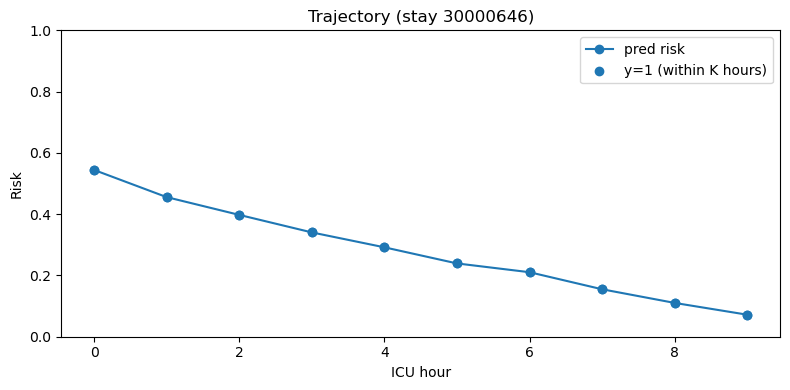

In [63]:
import matplotlib.pyplot as plt

sid = int(30000646)
pat = pred_df[pred_df["stay_id"] == sid].sort_values("hour")

plt.figure(figsize=(8,4))
plt.plot(pat["hour"], pat["pred_prob"], marker="o", label="pred risk")
plt.scatter(pat.loc[pat["y"]==1, "hour"],
            pat.loc[pat["y"]==1, "pred_prob"],
            label="y=1 (within K hours)", zorder=3)
plt.ylim(0,1)
plt.xlabel("ICU hour")
plt.ylabel("Risk")
plt.title(f"Trajectory (stay {sid})")
plt.legend()
plt.tight_layout()
plt.show()


In [64]:
sepsis_comorbidity[sepsis_comorbidity['stay_id']==30000646]

,subject_id,hadm_id,stay_id,admittime,dischtime,hospital_expire_flag,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,...,suspected_infection_time,sofa_time,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3
19619,12207593,22795209,30000646,2194-04-27 18:43:00,2194-05-06 02:29:00,1,0,0,0,1,...,2194-04-29 01:00:00,2194-04-29 11:00:00,3.0,2.0,0.0,0.0,1.0,0.0,0.0,True


In [65]:
from sklearn.metrics import roc_auc_score

y_true = pred_df["y"].values.astype(int)
y_score = pred_df["pred_prob"].values

roc_auc = roc_auc_score(y_true, y_score)
roc_auc


0.9202476850478715

In [66]:
from sklearn.metrics import average_precision_score

ap = average_precision_score(y_true, y_score)
ap


0.37990276013961566

In [67]:
y_true.mean()   # random classifier 的 AP


0.045280985856557036

In [68]:
from sklearn.metrics import confusion_matrix

threshold = 0.2
y_pred = (y_score >= threshold).astype(int)

confusion_matrix(y_true, y_pred)


array([[171768,  10759],
       [  3364,   5293]])

In [69]:
threshold = 0.3

stay_eval = pred_df.groupby("stay_id").apply(
    lambda g: pd.Series({
        "has_sepsis_window": int((g["y"] == 1).any()),
        "ever_alert": int((g["pred_prob"] >= threshold).any()),
        "hit_window": int(((g["pred_prob"] >= threshold) & (g["y"] == 1)).any()),
        "max_prob": float(g["pred_prob"].max()),
        "first_alert_hour": (
            g.loc[g["pred_prob"] >= threshold, "hour"].min()
            if (g["pred_prob"] >= threshold).any() else None
        ),
    })
).reset_index()


/tmp/ipykernel_1726/966787032.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stay_eval = pred_df.groupby("stay_id").apply(


In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(
    stay_eval["has_sepsis_window"],
    stay_eval["ever_alert"]
)


array([[ 541, 2510],
       [ 125, 2034]])

In [71]:
early_hits = stay_eval[
    (stay_eval["has_sepsis_window"] == 1) &
    (stay_eval["hit_window"] == 1)
]

early_hits["first_alert_hour"].describe()


count    1919.000000
mean        0.244919
std         0.614768
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: first_alert_hour, dtype: float64

In [72]:
summary = {
    "Time-step ROC-AUC": roc_auc,
    "Time-step AP": ap,
    "Positive rate": y_true.mean(),
    "Stay-level sensitivity": (
        stay_eval.loc[stay_eval["has_sepsis_window"]==1, "ever_alert"].mean()
    ),
    "Stay-level hit rate (in window)": (
        stay_eval.loc[stay_eval["has_sepsis_window"]==1, "hit_window"].mean()
    ),
    "Overall alert rate": stay_eval["ever_alert"].mean()
}

summary


{'Time-step ROC-AUC': 0.9202476850478715,
 'Time-step AP': 0.37990276013961566,
 'Positive rate': 0.045280985856557036,
 'Stay-level sensitivity': 0.9421028253821213,
 'Stay-level hit rate (in window)': 0.888837424733673,
 'Overall alert rate': 0.872168905950096}

In [73]:
pat["cum_risk"] = 1 - (1 - pat["pred_prob"]).cumprod()


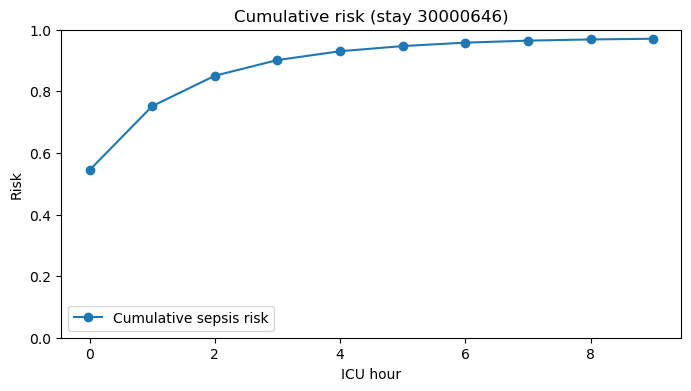

In [74]:
plt.figure(figsize=(8,4))
plt.plot(pat["hour"], pat["cum_risk"], marker="o", label="Cumulative sepsis risk")
plt.xlabel("ICU hour")
plt.ylabel("Risk")
plt.ylim(0,1)
plt.title(f"Cumulative risk (stay {sid})")
plt.legend()
plt.show()


In [75]:
pat["risk_max_12h"] = pat["pred_prob"].rolling(12, min_periods=1).max()
